## Stock Prediction Models Based on Moving Average, Linear Regression and kNN Classification Algorithms

References :  <br>  https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/  <br>  https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/  <br>  https://towardsdatascience.com/aifortrading-2edd6fac689d  <br>  https://github.com/zhiruiwang/LSTM_stock_price_prediction/blob/master/code.ipynb  <br>  https://github.com/amunategui/CVAE-Financial-Anomaly-Detection/blob/master/Financial%20Compliance%20and%20Fraud%20Detection%20with%20Conditional%20Variational%20Autoencoders%20(CVAE)%20and%20Tensorflow.ipynb  <br>  https://amunategui.github.io/cvae-in-finance/index.html  <br>  https://amunategui.github.io/cvae-in-finance/index.html  <br>  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0180944

## Import the Required Libraries 

In [1]:
import pandas_datareader.data as pdr
import fix_yahoo_finance as fix
fix.pdr_override()
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data from Yahoo Finance fr Apple Inc.

Here we will download the financial data for Apple Inc. Stock Prices for the Duration of 1st January 2013 to 1st December 2018 from Yahoo Finance Stock Data and convert it into a pandas DataFrame for furhter analysis using LSTM Autoencoders.

In [2]:
class GetData:
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

    # get stock data
    def get_stock_data(self):
        stock_data_AAPL = pdr.get_data_yahoo(self.ticker, self.start, self.end)
        stock_data_AAPL.to_csv("stock_data_AAPL.csv")

if __name__ == "__main__":
    data = GetData("AAPL", "2013-01-01", "2018-12-01")
data.get_stock_data()

[*********************100%***********************]  1 of 1 downloaded


Here we will use a date parser function for converting timestamps into dates for ease of use in the code.

In [3]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

## Set Figure Size, Read .csv file and Display head

In [5]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

stock_data_AAPL = pd.read_csv('stock_data_AAPL.csv', header=0, parse_dates=[0], date_parser=parser)

#print the head
stock_data_AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.12,79.29,77.38,78.43,55.47,140129500
1,2013-01-03,78.27,78.52,77.29,77.44,54.77,88241300
2,2013-01-04,76.71,76.95,75.12,75.29,53.25,148583400
3,2013-01-07,74.57,75.61,73.60,74.84,52.93,121039100
4,2013-01-08,75.60,75.98,74.46,75.04,53.07,114676800


## Plot the Stock Market Graph for Apple Inc. for given duration

C:\Users\NEERAJ\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


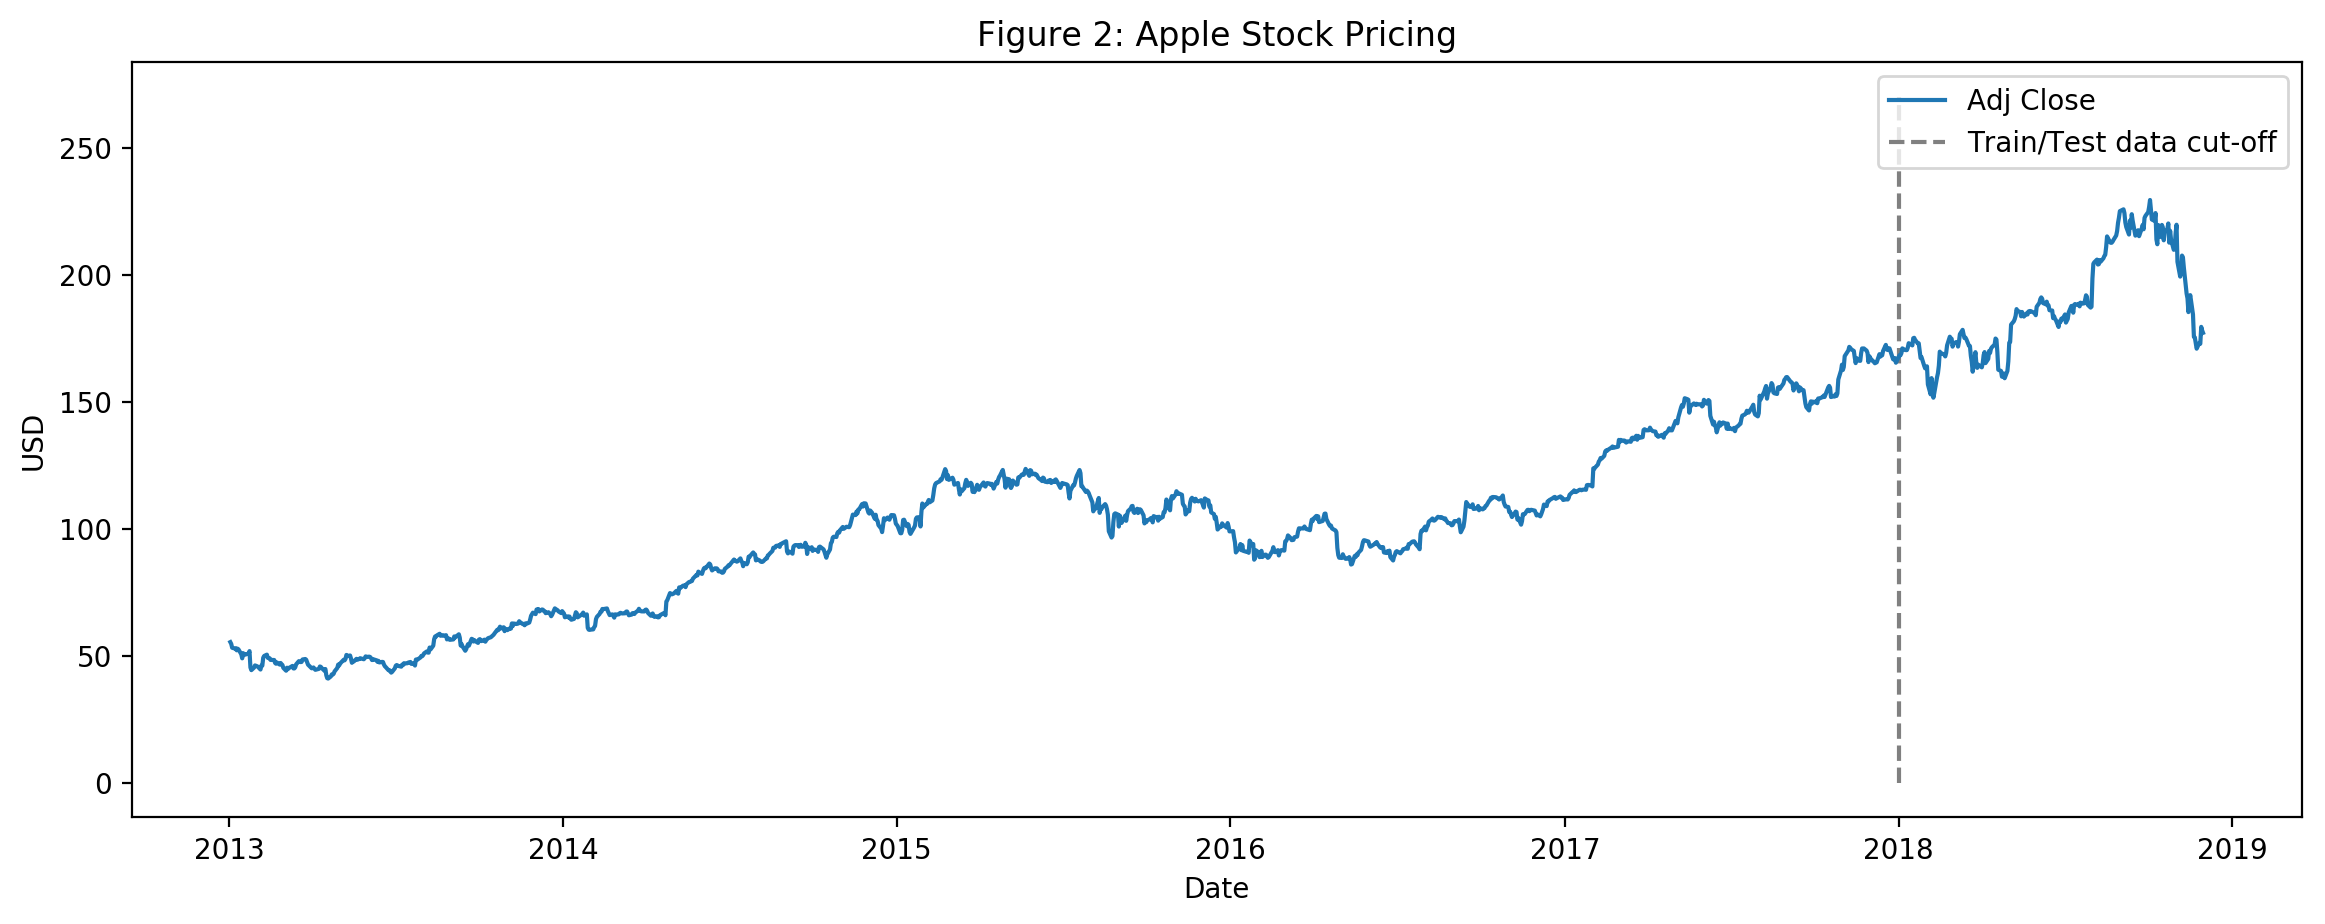

In [6]:
plt.figure(figsize=(14, 5), dpi=200)
plt.plot(stock_data_AAPL['Date'], stock_data_AAPL['Adj Close'])
plt.vlines(datetime.date(2018,1, 1), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 2: Apple Stock Pricing')
plt.legend()
plt.show()

## Moving Average Model for Stock Price Predictions

## Create a Datframe with data and targets to perform analysis

In [11]:
#creating dataframe with date and the target variable
data = stock_data_AAPL.sort_index(ascending=True, axis=0)
new_data_AAPL = pd.DataFrame(index=range(0,len(stock_data_AAPL)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

## Split into Training Data and Validation Data

In [12]:
#splitting into train and validation
train = new_data[:1000]
valid = new_data[1000:]
new_data_AAPL.shape, train.shape, valid.shape

((1491, 2), (1000, 2), (491, 2))

In [13]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2013-01-02 00:00:00'),
 Timestamp('2016-12-19 00:00:00'),
 Timestamp('2016-12-20 00:00:00'),
 Timestamp('2018-11-30 00:00:00'))

## Calculate the Moving Average and Make Predictions for Stock Prices

In [15]:
#make predictions
preds = []
for i in range(0,491):
    a = train['Close'][len(train)-491+i:].sum() + sum(preds)
    b = a/491
    preds.append(b)

## Calculate the RMSE for the Model

In [16]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

66.47752601830842

## Plot the Graph of the Original Values Vs the Predicted Values

C:\Users\NEERAJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NEERAJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


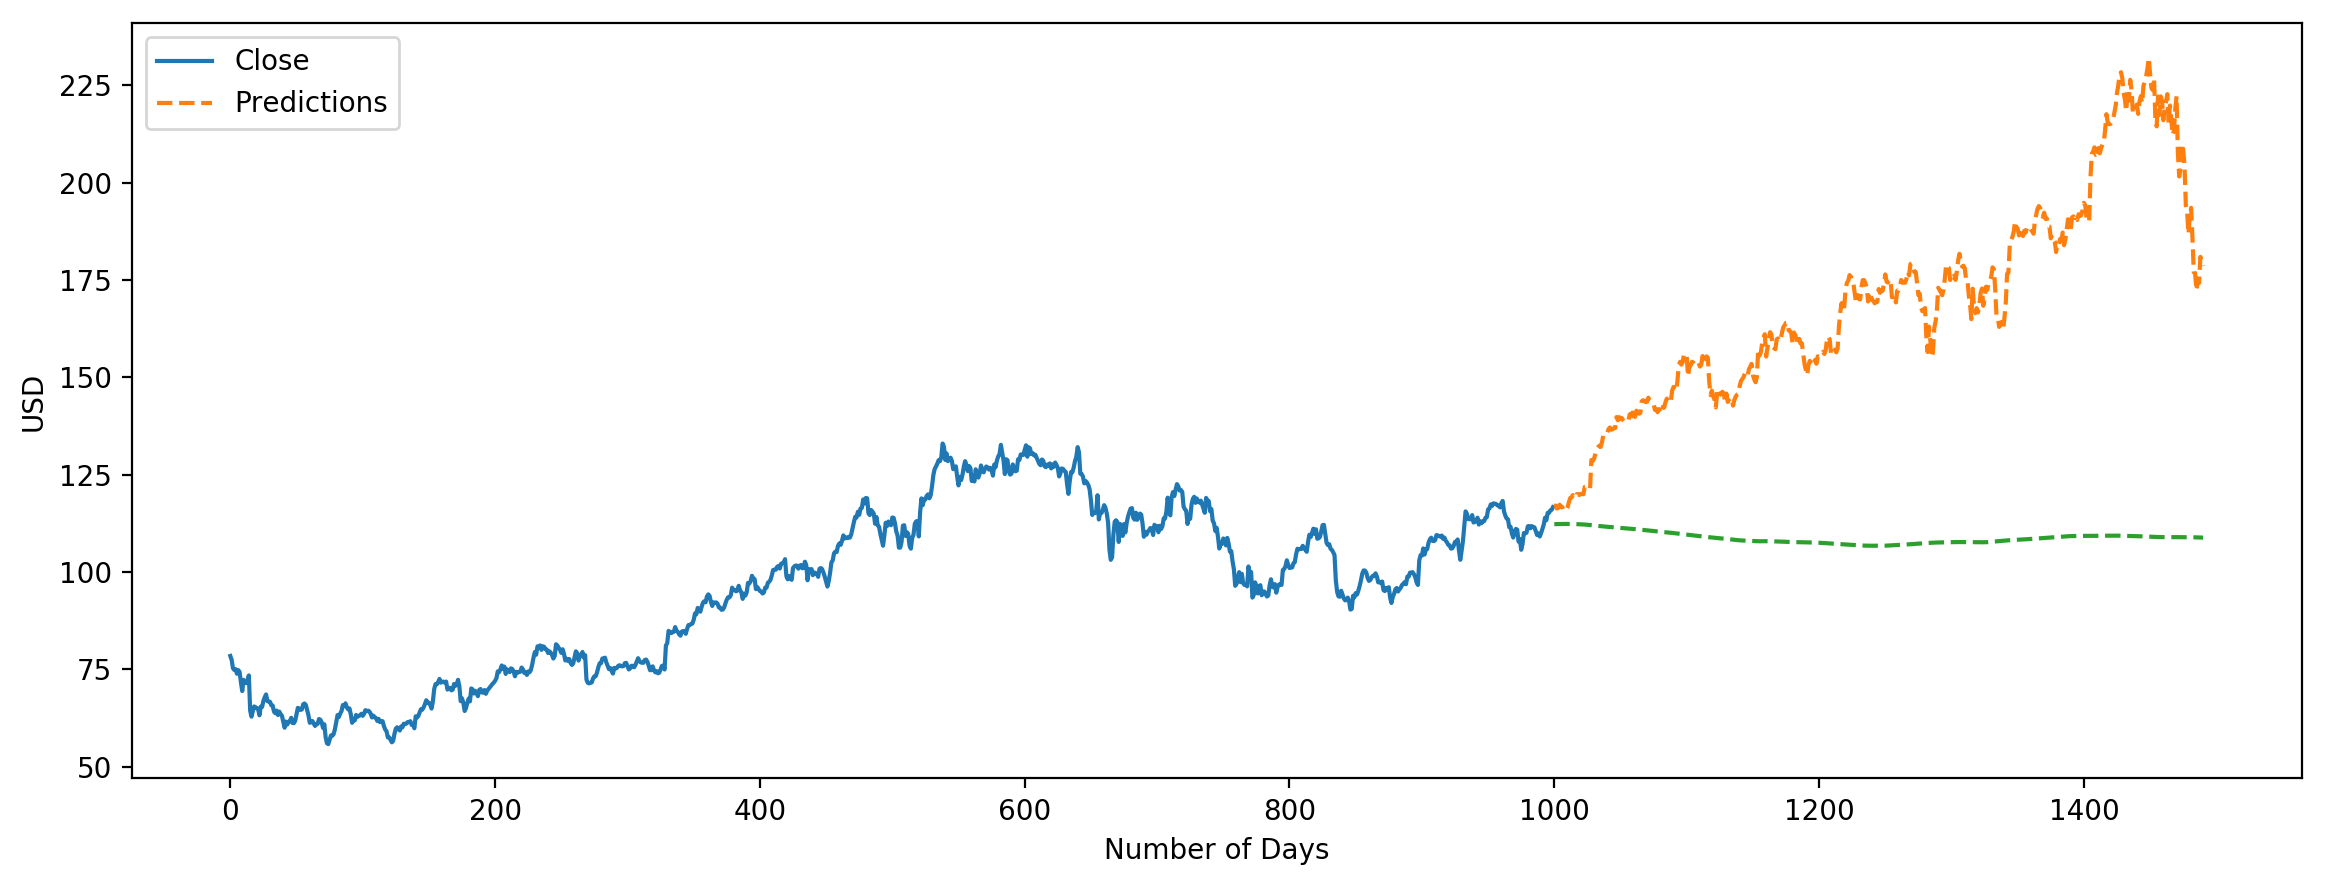

In [18]:
#plot
plt.figure(figsize=(14, 5), dpi=200)
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.xlabel('Number of Days')
plt.ylabel('USD')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']],marker='', linestyle='dashed')
plt.legend(('Close','Predictions'))
plt.show()

## Linear Regression 

## Pre-process the Data for analysis

In [21]:
#setting index as date values
stock_data_AAPL['Date'] = pd.to_datetime(stock_data_AAPL.Date,format='%Y-%m-%d')
stock_data_AAPL.index = stock_data_AAPL['Date']

#sorting
data = stock_data_AAPL.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(stock_data_AAPL)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'].dt.strftime('%Y%m%d').astype(float)[i]
    new_data['Close'][i] = data['Close'][i]

## Split into Training Data and Validation Data

In [22]:
#split into train and validation
train = new_data[:1000]
valid = new_data[1000:]

x_train = train.drop(columns=['Close'], axis=1)
y_train = train['Close']
x_valid = valid.drop(columns=['Close'], axis=1)
y_valid = valid['Close']

## Perfrom Linear Regression 

In [23]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Calculate RMSE for the Model

In [24]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

38.361356515121585

## Plot the Graph of the Original Values Vs the Predicted Values

C:\Users\NEERAJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\NEERAJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


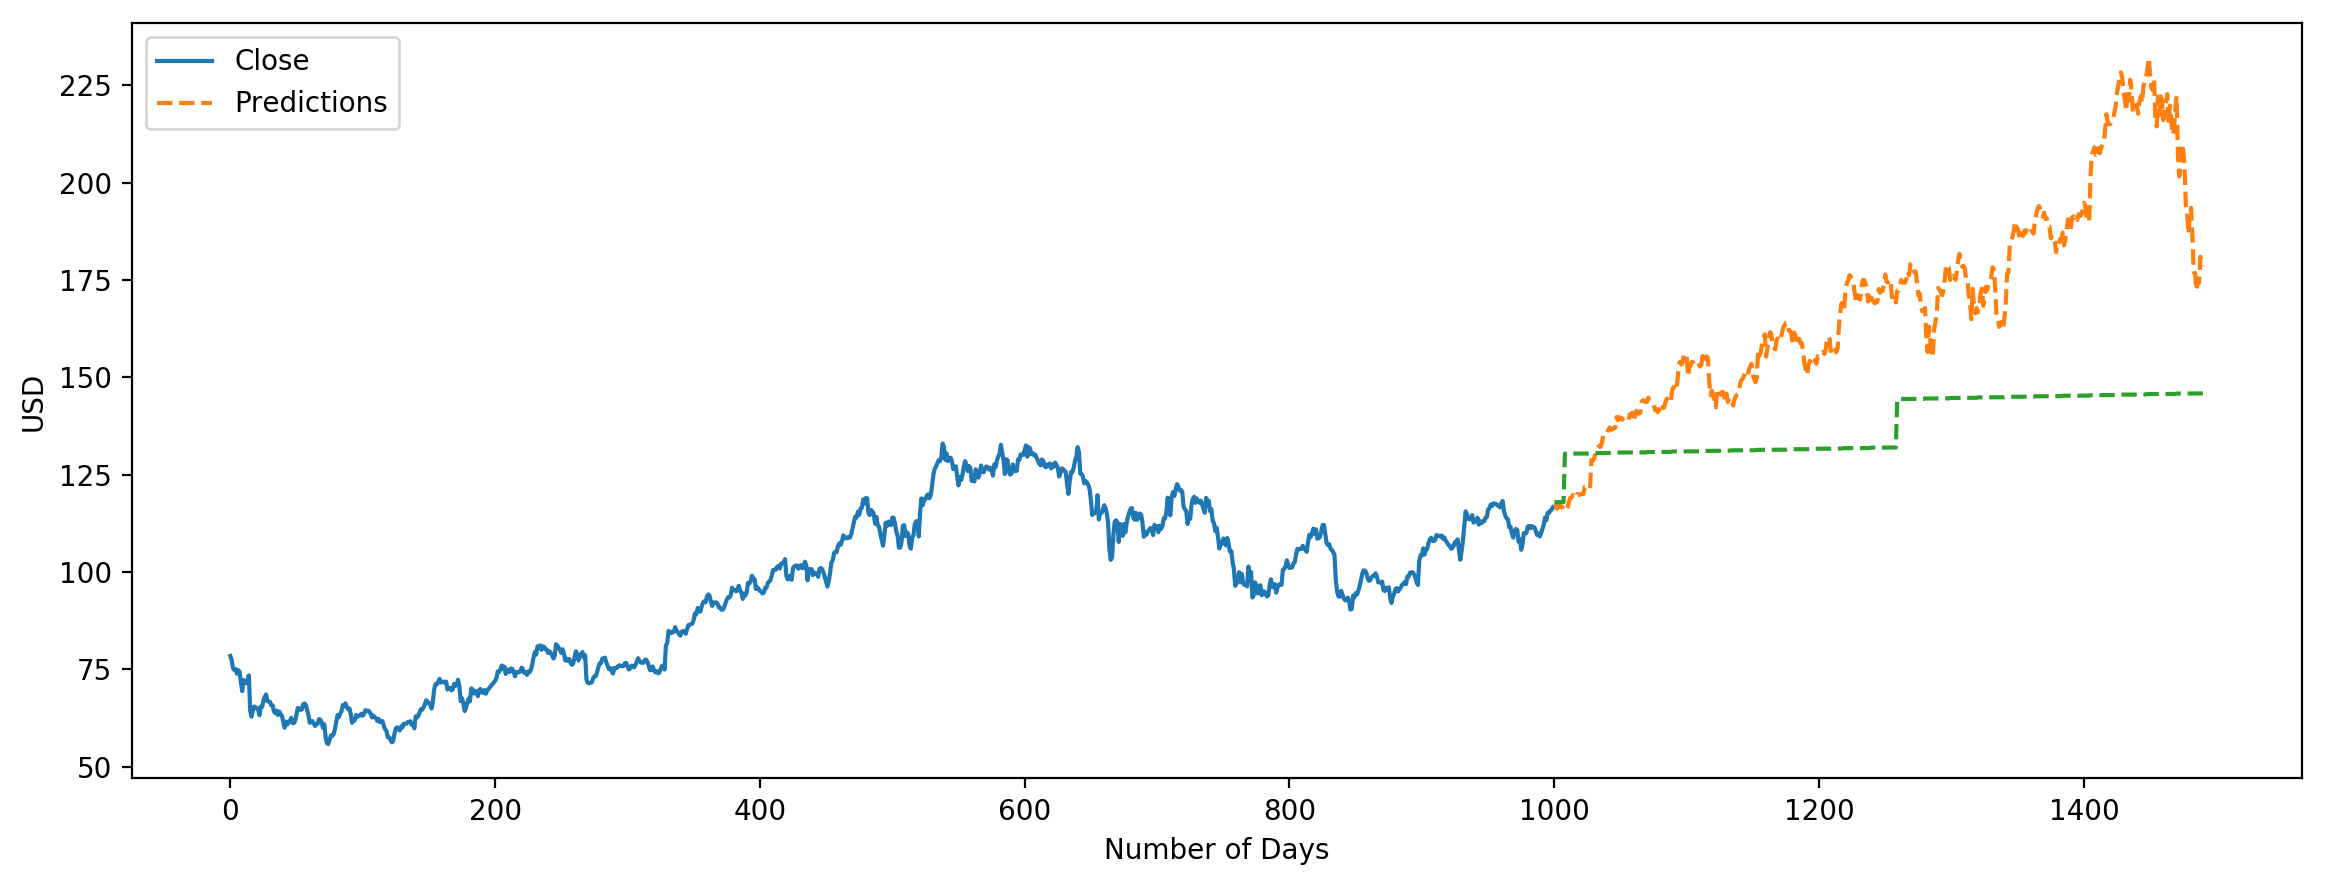

In [25]:
#plot
plt.figure(figsize=(14, 5), dpi=200)
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.xlabel('Number of Days')
plt.ylabel('USD')
valid.index = new_data[1000:].index
train.index = new_data[:1000].index
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']], marker='', linestyle='dashed')
plt.legend(('Close','Predictions'))
plt.show()

## kNN Classification Model

## Pre-process the Data

In [26]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

C:\Users\NEERAJ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\NEERAJ\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## FInd the Best Parameters Using GridSearch Algorithm and Train the Model

In [27]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

## Calculate The RMSE for the Model

In [28]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

68.0947753180154

## Plot the Graph of the Original Values Vs the Predicted Values

C:\Users\NEERAJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\NEERAJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


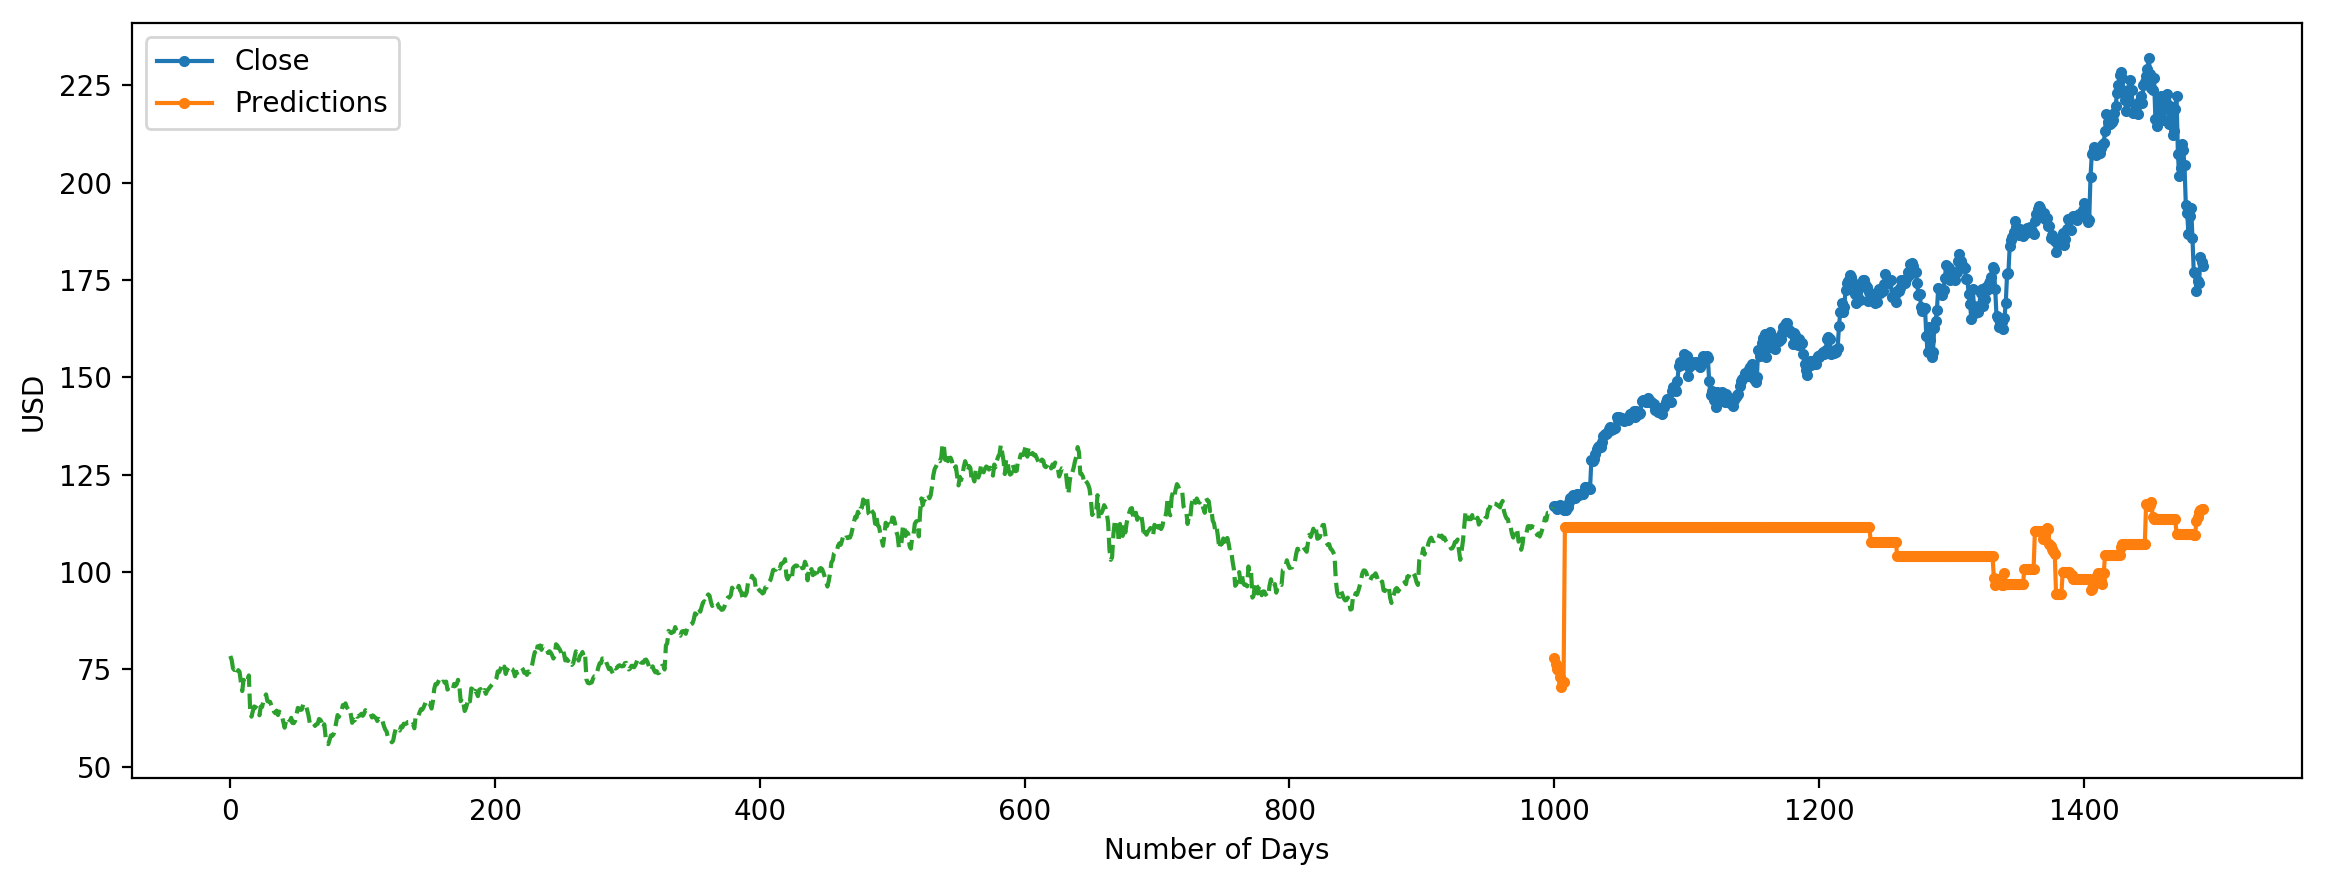

In [29]:
#plot
plt.figure(figsize=(14, 5), dpi=200)
plt.xlabel('Number of Days')
plt.ylabel('USD')
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close','Predictions']], marker='.')
plt.plot(train['Close'], marker='', linestyle='dashed')
plt.legend(('Close','Predictions'))
plt.show()

## As we can see from the above models that the Original values and the Predicted values differ a lot and that the above models perform poorly. But it can observed that these models provided the base ideas for Stock Market Analysis and the errors and problems which we can run into while performing analysis on the same.